In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from math import cos, sin, exp, sqrt, pi, e
from datetime import datetime
from pandas import DataFrame

mypalette = sns.color_palette(['#162f4d']) # https://www.hsluv.org/
sns.set_palette(mypalette)

## Read the dataset

In [2]:
Tamb_input_path = os.path.join(".", "data", "Ospitaletto", "processed", "Tamb_input.xls")
Tamb_hourly_path = os.path.join(".", "data", "Ospitaletto", "processed", "Tamb_hourly.xls")

Tamb_min: 4.103080157839738 Tamb_max 26.56602133917541


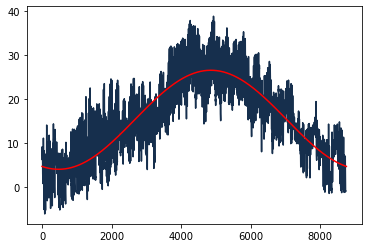

In [3]:
temp=pd.read_excel(Tamb_input_path ,squeeze=True)
Treal=pd.read_excel(Tamb_hourly_path, squeeze=True)

Tamb_fit=pd.Series(temp)
Tamb=pd.Series(Treal)

Tamb.plot()
Tamb_fit.plot(color='red')
print('Tamb_min:',Tamb_fit.min(),'Tamb_max',Tamb_fit.max())


In [4]:
date_rng = pd.date_range(start='1/1/2019 00:00:00', end='31/12/2019 00:00:00', freq='H')
df = pd.DataFrame(date_rng, columns=['date'])

df['Tamb_fit'] = Tamb_fit
df['Tamb'] = Tamb


df.head(12)
#df[df.index.month==12]



,date,Tamb_fit,Tamb
0,2019-01-01 00:00:00,4.751630,9.100000
1,2019-01-01 01:00:00,4.748935,9.200000
2,2019-01-01 02:00:00,4.746245,9.166667
3,2019-01-01 03:00:00,4.743561,9.183333
4,2019-01-01 04:00:00,4.740882,8.916667
5,2019-01-01 05:00:00,4.738209,8.083333
6,2019-01-01 06:00:00,4.735541,7.766667
7,2019-01-01 07:00:00,4.732878,7.033333
8,2019-01-01 08:00:00,4.730221,6.316667
9,2019-01-01 09:00:00,4.727570,6.216667


# Data manipulation-processing

In [5]:
Tamb_hourly=pd.DataFrame(df, columns = ['date','Tamb','Tamb_fit']) #Ambient temperature on an hourly resolutionT


In [6]:
Tamb_hourly['date'] =pd.to_datetime(Tamb_hourly['date'], infer_datetime_format=True) #Estoy asociando el index de tiempo a la columna Data-Ora
Tamb_hourly=Tamb_hourly.set_index('date')

In [7]:
Tamb_hourly.head()

,Tamb,Tamb_fit
date,,
2019-01-01 00:00:00,9.100000,4.751630
2019-01-01 01:00:00,9.200000,4.748935
2019-01-01 02:00:00,9.166667,4.746245
2019-01-01 03:00:00,9.183333,4.743561
2019-01-01 04:00:00,8.916667,4.740882


In [8]:
Tamb_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8737 entries, 2019-01-01 00:00:00 to 2019-12-31 00:00:00
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tamb      8737 non-null   float64
 1   Tamb_fit  8737 non-null   float64
dtypes: float64(2)
memory usage: 204.8 KB


In [9]:
Tamb_hourly.index

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2019-12-30 15:00:00', '2019-12-30 16:00:00',
               '2019-12-30 17:00:00', '2019-12-30 18:00:00',
               '2019-12-30 19:00:00', '2019-12-30 20:00:00',
               '2019-12-30 21:00:00', '2019-12-30 22:00:00',
               '2019-12-30 23:00:00', '2019-12-31 00:00:00'],
              dtype='datetime64[ns]', name='date', length=8737, freq=None)

In [10]:
# Tamb_hourly.reset_index(inplace=True)

In [11]:
Tamb_hourly['Month'] = Tamb_hourly.index.month


In [12]:
Tamb_hourly

,Tamb,Tamb_fit,Month
date,,,
2019-01-01 00:00:00,9.100000,4.751630,1
2019-01-01 01:00:00,9.200000,4.748935,1
2019-01-01 02:00:00,9.166667,4.746245,1
2019-01-01 03:00:00,9.183333,4.743561,1
2019-01-01 04:00:00,8.916667,4.740882,1
...,...,...,...
2019-12-30 20:00:00,0.733333,4.829299,12
2019-12-30 21:00:00,-0.100000,4.826452,12
2019-12-30 22:00:00,-0.250000,4.823610,12


In [13]:
Tmin_i = float(input("Enter min setpoint temperature: "))
Tmax_i = float(input("Enter max setpoint temperature: "))

Enter min setpoint temperature:  45
Enter max setpoint temperature:  55


In [17]:
def climatic_curve(Tamb_h):
    Tmin_o = 2.38 #minimum outdoor T threshold in which the space heating system turns on
    Tmax_o = 7.25 #maximum outdoor T threshold in which the space heating system turns off

    if Tamb_h <= Tmin_o:   
        Tsh = Tmax_i
    elif Tamb_h >= Tmax_o:
        Tsh = Tmin_i
    else:
        m = (Tmax_i-Tmin_i)/(Tmin_o-Tmax_o)
        b = -m*Tmin_o+Tmax_i
        Tsh = m*Tamb_h+b
    return Tsh
 

In [18]:
Tamb_hourly['Tsh'] = Tamb_hourly['Tamb'].apply(climatic_curve)
#Tamb_hourly['Tsh'] = Tamb['Temp'].apply(lambda x: climatic_curve(x))
Tamb_hourly

,Tamb,Tamb_fit,Month,Tsh,Tdhw
date,,,,,
2019-01-01 00:00:00,9.100000,4.751630,1,45.0,55.0
2019-01-01 01:00:00,9.200000,4.748935,1,45.0,55.0
2019-01-01 02:00:00,9.166667,4.746245,1,45.0,55.0
2019-01-01 03:00:00,9.183333,4.743561,1,45.0,55.0
2019-01-01 04:00:00,8.916667,4.740882,1,45.0,55.0
...,...,...,...,...,...
2019-12-30 20:00:00,0.733333,4.829299,12,55.0,55.0
2019-12-30 21:00:00,-0.100000,4.826452,12,55.0,55.0
2019-12-30 22:00:00,-0.250000,4.823610,12,55.0,55.0


In [16]:
Tdhw = float(input("Enter domestic hot water temperature: "))

Tamb_hourly["Tdhw"] = Tdhw
Tamb_hourly

Enter domestic hot water temperature:  55


,Tamb,Tamb_fit,Month,Tsh,Tdhw
date,,,,,
2019-01-01 00:00:00,9.100000,4.751630,1,45.0,55.0
2019-01-01 01:00:00,9.200000,4.748935,1,45.0,55.0
2019-01-01 02:00:00,9.166667,4.746245,1,45.0,55.0
2019-01-01 03:00:00,9.183333,4.743561,1,45.0,55.0
2019-01-01 04:00:00,8.916667,4.740882,1,45.0,55.0
...,...,...,...,...,...
2019-12-30 20:00:00,0.733333,4.829299,12,55.0,55.0
2019-12-30 21:00:00,-0.100000,4.826452,12,55.0,55.0
2019-12-30 22:00:00,-0.250000,4.823610,12,55.0,55.0


In [ ]:
Tamb_hourly.head(12)


In [ ]:
november_data = Tamb_hourly[Tamb_hourly.index.month == 11 ]
november_data[["Tsh","Tdhw"]].plot(figsize=(10,6), color=["#4e97a2",'#82272e'])

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
Tamb_hourly[["Tsh","Tdhw"]].dtypes

In [19]:
def Tuser(col):
    Tsh=col["Tsh"]
    Tdhw=col["Tdhw"]
    fecha=col.name
    #Las proporciones dependen de la localización
    if fecha.month==1:
        resultado= 0.98*Tsh+0.02*Tdhw
       
    elif fecha.month==2:
        resultado=0.96*Tsh+0.04*Tdhw
    
    elif fecha.month==3:
        resultado=0.94*Tsh+0.06*Tdhw
    
    elif fecha.month==4:
        resultado=0.90*Tsh+0.1*Tdhw
    
    elif fecha.month==5:
        resultado=0.75*Tsh+0.25*Tdhw
    
    elif fecha.month==6:
        resultado=0.25*Tsh+0.75*Tdhw
    
    elif fecha.month==7:
        resultado=0*Tsh+1.0*Tdhw
    
    elif fecha.month==8:
        resultado=0*Tsh+1.0*Tdhw
    
    elif fecha.month==9:
        resultado=0.1*Tsh+0.9*Tdhw
    
    elif fecha.month==10:
        resultado=0.80*Tsh+0.2*Tdhw
    
    elif fecha.month==11:
        resultado=0.95*Tsh+0.05*Tdhw
    
    elif fecha.month==12:
        resultado=0.97*Tsh+0.03*Tdhw
        
    return resultado

In [20]:
Tamb_hourly["Tuser"] = Tamb_hourly.apply(lambda x: Tuser(x), axis=1)

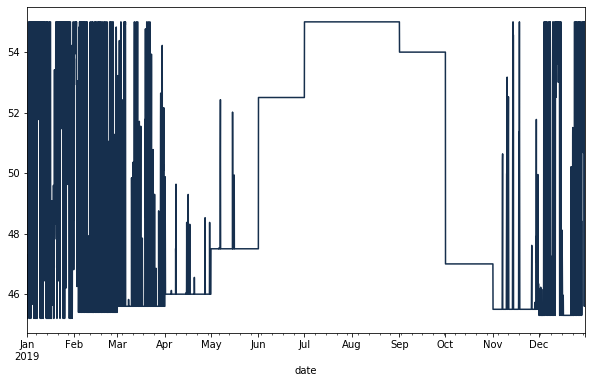

In [21]:
Tamb_hourly["Tuser"].plot(figsize=(10,6))

In [ ]:
november_data = Tamb_hourly[Tamb_hourly.index.month == 11 ]
november_data["Tuser"].plot(figsize=(10,6))

# Network temperature 

In [22]:
zz=1               #Depth [m]
alpha=0.06048      #Ground thermal diffusivity, Banks [m^2/day]
alpha_sec=7e-7 #Ground thermal diffusivity, Banks [m^2/s]
t_sec=365*24*3600
d_shift_max = Tamb_hourly['Tamb_fit'].idxmax(axis=0)
dd_max=(Tamb_hourly.index.get_loc(d_shift_max))/24

Tg_und = Tamb.mean() #T_ave_fit #Undisturbed ground temperature
DT_y= 11.23 #abs(DT_y_fit)



In [24]:
def ground_temperature_hour(t,zz):
    #t is time in hours, but the calculation is done is seconds
    T_banks= Tg_und+DT_y*exp(-zz*sqrt(pi/(alpha_sec*t_sec)))*cos(2*pi/t_sec*(t-dd_max*24)*3600-zz*sqrt(pi/(alpha_sec*t_sec)))
    
    return pd.Series(T_banks)

In [26]:
Tamb_hourly = Tamb_hourly.reset_index(drop=False)
Tamb_hourly

,date,Tamb,Tamb_fit,Month,Tsh,Tdhw,Tuser
0,2019-01-01 00:00:00,9.100000,4.751630,1,45.0,55.0,45.2
1,2019-01-01 01:00:00,9.200000,4.748935,1,45.0,55.0,45.2
2,2019-01-01 02:00:00,9.166667,4.746245,1,45.0,55.0,45.2
3,2019-01-01 03:00:00,9.183333,4.743561,1,45.0,55.0,45.2
4,2019-01-01 04:00:00,8.916667,4.740882,1,45.0,55.0,45.2
...,...,...,...,...,...,...,...
8732,2019-12-30 20:00:00,0.733333,4.829299,12,55.0,55.0,55.0
8733,2019-12-30 21:00:00,-0.100000,4.826452,12,55.0,55.0,55.0
8734,2019-12-30 22:00:00,-0.250000,4.823610,12,55.0,55.0,55.0
8735,2019-12-30 23:00:00,-0.983333,4.820774,12,55.0,55.0,55.0


In [27]:
Tamb_hourly.index

RangeIndex(start=0, stop=8737, step=1)

In [28]:
Tamb_hourly["Tground"] = Tamb_hourly.apply(lambda fila: ground_temperature_hour(fila.name + 1,1), axis=1) # x + 1 because it starts on 0.
Tamb_hourly

,date,Tamb,Tamb_fit,Month,Tsh,Tdhw,Tuser,Tground
0,2019-01-01 00:00:00,9.100000,4.751630,1,45.0,55.0,45.2,9.562255
1,2019-01-01 01:00:00,9.200000,4.748935,1,45.0,55.0,45.2,9.558623
2,2019-01-01 02:00:00,9.166667,4.746245,1,45.0,55.0,45.2,9.554994
3,2019-01-01 03:00:00,9.183333,4.743561,1,45.0,55.0,45.2,9.551368
4,2019-01-01 04:00:00,8.916667,4.740882,1,45.0,55.0,45.2,9.547745
...,...,...,...,...,...,...,...,...
8732,2019-12-30 20:00:00,0.733333,4.829299,12,55.0,55.0,55.0,9.665159
8733,2019-12-30 21:00:00,-0.100000,4.826452,12,55.0,55.0,55.0,9.661444
8734,2019-12-30 22:00:00,-0.250000,4.823610,12,55.0,55.0,55.0,9.657732
8735,2019-12-30 23:00:00,-0.983333,4.820774,12,55.0,55.0,55.0,9.654023


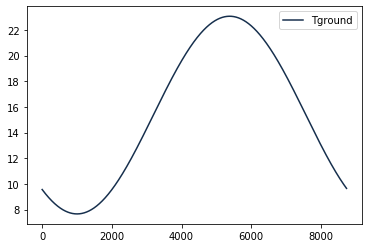

In [29]:
Tamb_hourly[["Tground"]].plot()

In [30]:
depth_aquifer= float(input("""Aquifer temperature depth:
"""))

Aquifer temperature depth:
 30


In [31]:
# fila.name because that's the index (numeric range from 0 to 8737)
# fila.name + 1 because the range starts in 0 and the function assumes it begins with 1.
Tamb_hourly["Taq"] = Tamb_hourly.apply(lambda fila: ground_temperature_hour(fila.name + 1, depth_aquifer), axis=1)
Tamb_hourly

,date,Tamb,Tamb_fit,Month,Tsh,Tdhw,Tuser,Tground,Taq
0,2019-01-01 00:00:00,9.100000,4.751630,1,45.0,55.0,45.2,9.562255,15.362232
1,2019-01-01 01:00:00,9.200000,4.748935,1,45.0,55.0,45.2,9.558623,15.362232
2,2019-01-01 02:00:00,9.166667,4.746245,1,45.0,55.0,45.2,9.554994,15.362232
3,2019-01-01 03:00:00,9.183333,4.743561,1,45.0,55.0,45.2,9.551368,15.362232
4,2019-01-01 04:00:00,8.916667,4.740882,1,45.0,55.0,45.2,9.547745,15.362233
...,...,...,...,...,...,...,...,...,...
8732,2019-12-30 20:00:00,0.733333,4.829299,12,55.0,55.0,55.0,9.665159,15.362230
8733,2019-12-30 21:00:00,-0.100000,4.826452,12,55.0,55.0,55.0,9.661444,15.362230
8734,2019-12-30 22:00:00,-0.250000,4.823610,12,55.0,55.0,55.0,9.657732,15.362230
8735,2019-12-30 23:00:00,-0.983333,4.820774,12,55.0,55.0,55.0,9.654023,15.362230


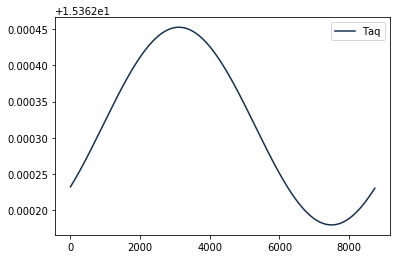

In [32]:
Tamb_hourly[["Taq"]].plot()

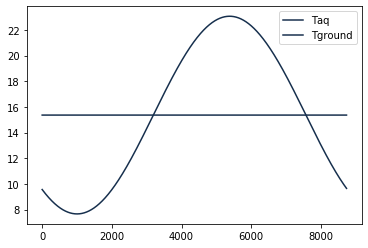

In [33]:
Tamb_hourly[["Taq", "Tground"]].plot()

In [34]:
Tamb_hourly = Tamb_hourly.set_index("date")
Tamb_hourly

,Tamb,Tamb_fit,Month,Tsh,Tdhw,Tuser,Tground,Taq
date,,,,,,,,
2019-01-01 00:00:00,9.100000,4.751630,1,45.0,55.0,45.2,9.562255,15.362232
2019-01-01 01:00:00,9.200000,4.748935,1,45.0,55.0,45.2,9.558623,15.362232
2019-01-01 02:00:00,9.166667,4.746245,1,45.0,55.0,45.2,9.554994,15.362232
2019-01-01 03:00:00,9.183333,4.743561,1,45.0,55.0,45.2,9.551368,15.362232
2019-01-01 04:00:00,8.916667,4.740882,1,45.0,55.0,45.2,9.547745,15.362233
...,...,...,...,...,...,...,...,...
2019-12-30 20:00:00,0.733333,4.829299,12,55.0,55.0,55.0,9.665159,15.362230
2019-12-30 21:00:00,-0.100000,4.826452,12,55.0,55.0,55.0,9.661444,15.362230
2019-12-30 22:00:00,-0.250000,4.823610,12,55.0,55.0,55.0,9.657732,15.362230


## Load Sources working hours

The file must be a boolean matrix $W$ of $24 x 7$. The rows represent the hours in a day, and the columns represent the days in the week. For all $i \in \{0,...,23\}$ and $j \in \{0,..., 6\}$ we have that $w_{i,j} \in \{0, 1\}$, where $w_{i,j} = 0$ means that the source doesn't produce energy at that hour $i$ on that day $j$. Similarly, $w_{i,j} = 1$ means that the source produces energy at that hour $i$ on that day $j$.

In [35]:
s1_schedule_path = os.path.join(".", "data", "private", "s1_source_fake_schedule.xlsx")
s1_schedule_path

'./data/private/s1_source_fake_schedule.xlsx'

In [36]:
s2_schedule_path = os.path.join(".", "data", "private", "s2_source_fake_schedule.xlsx")
s2_schedule_path

'./data/private/s2_source_fake_schedule.xlsx'

In [37]:
# Time repr
s1_schedule = pd.read_excel(s1_schedule_path, index_col="Time")
s1_schedule

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Time,,,,,,,
0,0,0,1,1,1,1,0
1,0,0,1,1,1,1,0
2,0,0,1,1,1,1,0
3,0,0,1,1,1,1,0
4,0,0,1,1,1,1,0
5,0,0,1,1,1,1,0
6,0,0,1,1,1,1,0
7,0,1,1,1,1,1,0
8,0,1,1,1,1,1,0


In [38]:
s1_schedule = s1_schedule.to_numpy()
s1_schedule

array([[0, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0, 0]])

In [39]:
# Tuesdays are closed at 6 but open are 7
s1_schedule[6,1], s1_schedule[7,1]

(0, 1)

In [40]:
# Time repr
s2_schedule = pd.read_excel(s2_schedule_path, index_col="Time")
s2_schedule

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Time,,,,,,,
0,1,1,0,0,1,1,1
1,1,1,0,0,1,1,1
2,1,1,0,0,1,1,1
3,1,1,0,0,1,1,1
4,1,1,0,0,1,1,1
5,1,1,0,0,1,1,1
6,1,1,0,0,1,1,1
7,1,1,0,1,1,1,1
8,1,1,0,1,1,1,1


In [41]:
s2_schedule = s2_schedule.to_numpy()
s2_schedule

array([[1, 1, 0, 0, 1, 1, 1],
       [1, 1, 0, 0, 1, 1, 1],
       [1, 1, 0, 0, 1, 1, 1],
       [1, 1, 0, 0, 1, 1, 1],
       [1, 1, 0, 0, 1, 1, 1],
       [1, 1, 0, 0, 1, 1, 1],
       [1, 1, 0, 0, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1],
       [1, 0, 0, 1, 1, 1, 1],
       [1, 0, 0, 1, 1, 1, 1],
       [1, 0, 0, 1, 1, 1, 1],
       [1, 0, 0, 1, 1, 1, 1],
       [1, 0, 0, 1, 1, 1, 1],
       [1, 0, 0, 1, 1, 1, 1],
       [1, 0, 0, 1, 1, 1, 1],
       [1, 0, 0, 1, 1, 1, 1]])

In [42]:
# Tuesdays are open at 16 but closed are 17
s2_schedule[15,1], s2_schedule[16,1]

(1, 0)

In [ ]:
Tamb_hourly

## Calculate Sources Temperature based on Working Hours

In [43]:
def get_temp_by_working_hours(temp_src, datetime, schedule):
    day_of_week = datetime.dayofweek
    hour_of_day = datetime.hour
    return temp_src * (schedule[hour_of_day, day_of_week])

In [44]:
Ts1 = float(input("""Temperature of source 1: 
"""))

Ts2 = float(input("""Temperature of source 2: 
"""))


Temperature of source 1: 
 25
Temperature of source 2: 
 21


In [45]:
Ts1 = Tamb_hourly.apply(lambda fila: get_temp_by_working_hours(Ts1, fila.name, s1_schedule), axis=1)
Ts1.head(50)

date
2019-01-01 00:00:00     0.0
2019-01-01 01:00:00     0.0
2019-01-01 02:00:00     0.0
2019-01-01 03:00:00     0.0
2019-01-01 04:00:00     0.0
2019-01-01 05:00:00     0.0
2019-01-01 06:00:00     0.0
2019-01-01 07:00:00    25.0
2019-01-01 08:00:00    25.0
2019-01-01 09:00:00    25.0
2019-01-01 10:00:00    25.0
2019-01-01 11:00:00    25.0
2019-01-01 12:00:00    25.0
2019-01-01 13:00:00    25.0
2019-01-01 14:00:00    25.0
2019-01-01 15:00:00    25.0
2019-01-01 16:00:00    25.0
2019-01-01 17:00:00    25.0
2019-01-01 18:00:00    25.0
2019-01-01 19:00:00    25.0
2019-01-01 20:00:00    25.0
2019-01-01 21:00:00    25.0
2019-01-01 22:00:00    25.0
2019-01-01 23:00:00    25.0
2019-01-02 00:00:00    25.0
2019-01-02 01:00:00    25.0
2019-01-02 02:00:00    25.0
2019-01-02 03:00:00    25.0
2019-01-02 04:00:00    25.0
2019-01-02 05:00:00    25.0
2019-01-02 06:00:00    25.0
2019-01-02 07:00:00    25.0
2019-01-02 08:00:00    25.0
2019-01-02 09:00:00    25.0
2019-01-02 10:00:00    25.0
2019-01-02 11:0

In [46]:
Ts2 = Tamb_hourly.apply(lambda fila: get_temp_by_working_hours(Ts2, fila.name, s2_schedule), axis=1)
Ts2.head(50)

date
2019-01-01 00:00:00    21.0
2019-01-01 01:00:00    21.0
2019-01-01 02:00:00    21.0
2019-01-01 03:00:00    21.0
2019-01-01 04:00:00    21.0
2019-01-01 05:00:00    21.0
2019-01-01 06:00:00    21.0
2019-01-01 07:00:00    21.0
2019-01-01 08:00:00    21.0
2019-01-01 09:00:00    21.0
2019-01-01 10:00:00    21.0
2019-01-01 11:00:00    21.0
2019-01-01 12:00:00    21.0
2019-01-01 13:00:00    21.0
2019-01-01 14:00:00    21.0
2019-01-01 15:00:00    21.0
2019-01-01 16:00:00     0.0
2019-01-01 17:00:00     0.0
2019-01-01 18:00:00     0.0
2019-01-01 19:00:00     0.0
2019-01-01 20:00:00     0.0
2019-01-01 21:00:00     0.0
2019-01-01 22:00:00     0.0
2019-01-01 23:00:00     0.0
2019-01-02 00:00:00     0.0
2019-01-02 01:00:00     0.0
2019-01-02 02:00:00     0.0
2019-01-02 03:00:00     0.0
2019-01-02 04:00:00     0.0
2019-01-02 05:00:00     0.0
2019-01-02 06:00:00     0.0
2019-01-02 07:00:00     0.0
2019-01-02 08:00:00     0.0
2019-01-02 09:00:00     0.0
2019-01-02 10:00:00     0.0
2019-01-02 11:0

In [47]:
Tamb_hourly["Ts1"] = Ts1
Tamb_hourly["Ts2"] = Ts2

Tamb_hourly

,Tamb,Tamb_fit,Month,Tsh,Tdhw,Tuser,Tground,Taq,Ts1,Ts2
date,,,,,,,,,,
2019-01-01 00:00:00,9.100000,4.751630,1,45.0,55.0,45.2,9.562255,15.362232,0.0,21.0
2019-01-01 01:00:00,9.200000,4.748935,1,45.0,55.0,45.2,9.558623,15.362232,0.0,21.0
2019-01-01 02:00:00,9.166667,4.746245,1,45.0,55.0,45.2,9.554994,15.362232,0.0,21.0
2019-01-01 03:00:00,9.183333,4.743561,1,45.0,55.0,45.2,9.551368,15.362232,0.0,21.0
2019-01-01 04:00:00,8.916667,4.740882,1,45.0,55.0,45.2,9.547745,15.362233,0.0,21.0
...,...,...,...,...,...,...,...,...,...,...
2019-12-30 20:00:00,0.733333,4.829299,12,55.0,55.0,55.0,9.665159,15.362230,0.0,21.0
2019-12-30 21:00:00,-0.100000,4.826452,12,55.0,55.0,55.0,9.661444,15.362230,0.0,21.0
2019-12-30 22:00:00,-0.250000,4.823610,12,55.0,55.0,55.0,9.657732,15.362230,0.0,21.0


In [48]:
def calculate_tnet(temp_s1, temp_s2, temp_aq):
    if temp_s1 == 0.0 and temp_s2 == 0.0:
        return temp_aq
    elif temp_s1 == 0.0:
        return temp_s2
    elif temp_s2 == 0.0:
        return temp_s1
    else:
        return np.mean([temp_s1, temp_s2])

In [49]:
Tamb_hourly["Tnet"] = Tamb_hourly.apply(lambda fila: calculate_tnet(fila["Ts1"], fila["Ts2"], fila["Taq"]), axis=1)
Tamb_hourly.head(50)

,Tamb,Tamb_fit,Month,Tsh,Tdhw,Tuser,Tground,Taq,Ts1,Ts2,Tnet
date,,,,,,,,,,,
2019-01-01 00:00:00,9.100000,4.751630,1,45.000000,55.0,45.200000,9.562255,15.362232,0.0,21.0,21.0
2019-01-01 01:00:00,9.200000,4.748935,1,45.000000,55.0,45.200000,9.558623,15.362232,0.0,21.0,21.0
2019-01-01 02:00:00,9.166667,4.746245,1,45.000000,55.0,45.200000,9.554994,15.362232,0.0,21.0,21.0
2019-01-01 03:00:00,9.183333,4.743561,1,45.000000,55.0,45.200000,9.551368,15.362232,0.0,21.0,21.0
2019-01-01 04:00:00,8.916667,4.740882,1,45.000000,55.0,45.200000,9.547745,15.362233,0.0,21.0,21.0
2019-01-01 05:00:00,8.083333,4.738209,1,45.000000,55.0,45.200000,9.544125,15.362233,0.0,21.0,21.0
2019-01-01 06:00:00,7.766667,4.735541,1,45.000000,55.0,45.200000,9.540508,15.362233,0.0,21.0,21.0
2019-01-01 07:00:00,7.033333,4.732878,1,45.444901,55.0,45.636003,9.536893,15.362233,25.0,21.0,23.0
2019-01-01 08:00:00,6.316667,4.730221,1,46.916496,55.0,47.078166,9.533282,15.362233,25.0,21.0,23.0


# Coefficient of performance (COP)

In [50]:
DT_evap =float(input("""Temperature difference among the supply and return pipes: 
#"""))

DT_hx=2.5
n_HP = 0.53
Te_o =Tamb_hourly['Tnet']-DT_evap-DT_hx
Tc_o =Tamb_hourly['Tuser']

Tamb_hourly['COP']= 1-n_HP+n_HP*(Tc_o+273.15)/(Tc_o+DT_hx-Te_o)

Temperature difference among the supply and return pipes: 
# 5


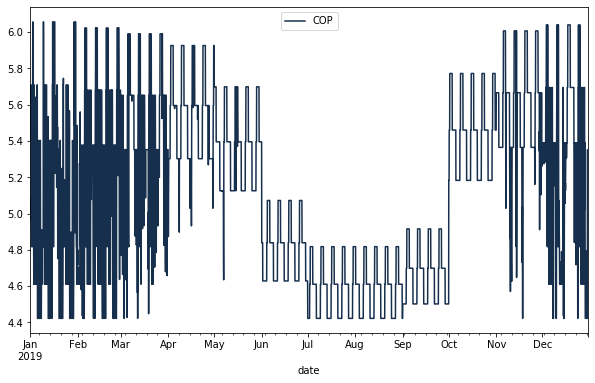

In [51]:
Tamb_hourly[['COP']].plot(figsize=(10,6))
#Tc_o.plot()

# Heat losses

In [82]:
def heat_losses(T_net,T_gr, DT_evap):
    U = 2
    T_ret=T_net-DT_evap
    HL_s= (T_net-T_gr)* U/1000 #Heat losses supply pipe [MWh]
    HL_r= (T_ret-T_gr)* U/1000 #Heat losses return pipe [MWh]
    
    return pd.Series([HL_s, HL_r, HL_s+HL_r] , index=['E_loss_s','E_loss_r','E_loss_tot'])


In [83]:
x= Tamb_hourly.apply(lambda fila: heat_losses(fila["Tnet"], fila["Tground"], DT_evap), axis=1, result_type='expand')

In [84]:
Tamb_hourly['E_loss_s'] = x['E_loss_s']  #pd.concat([Tamb_hourly, x], axis=1)
Tamb_hourly['E_loss_r'] = x['E_loss_r']
Tamb_hourly['E_loss_tot'] = x['E_loss_tot']

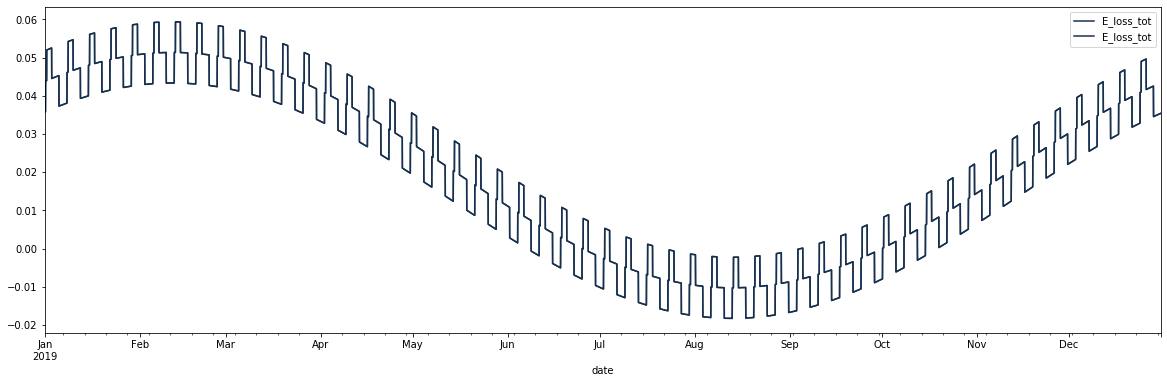

In [85]:
Tamb_hourly['E_loss_tot'].plot(figsize=(20,6))